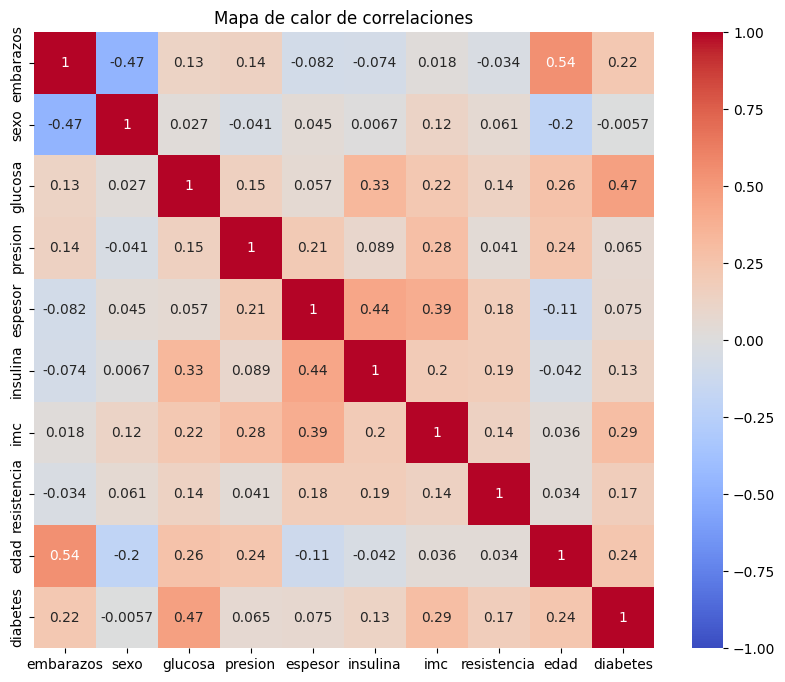

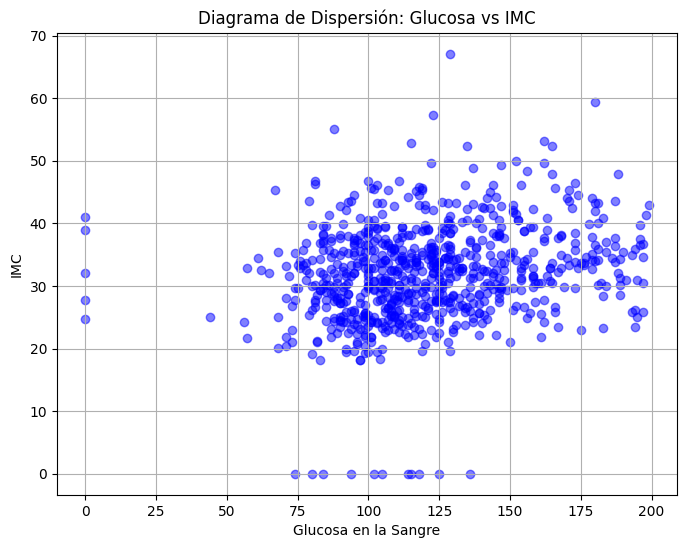

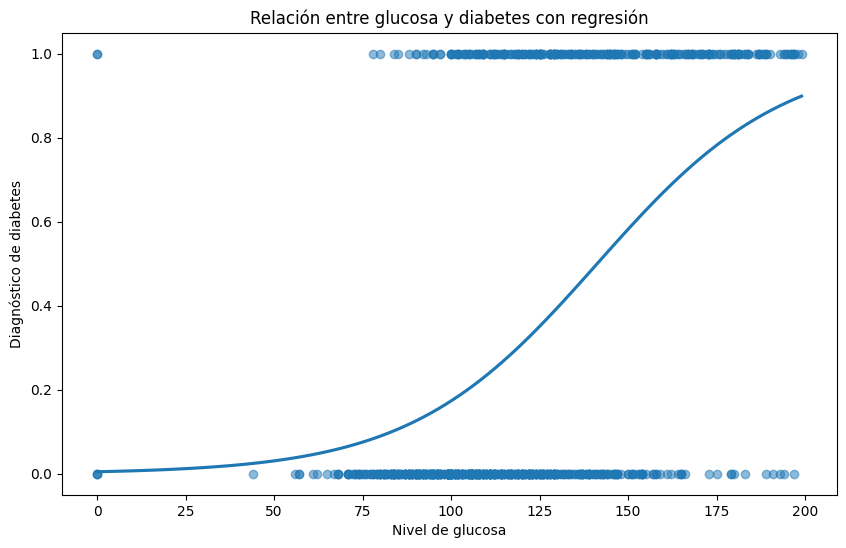

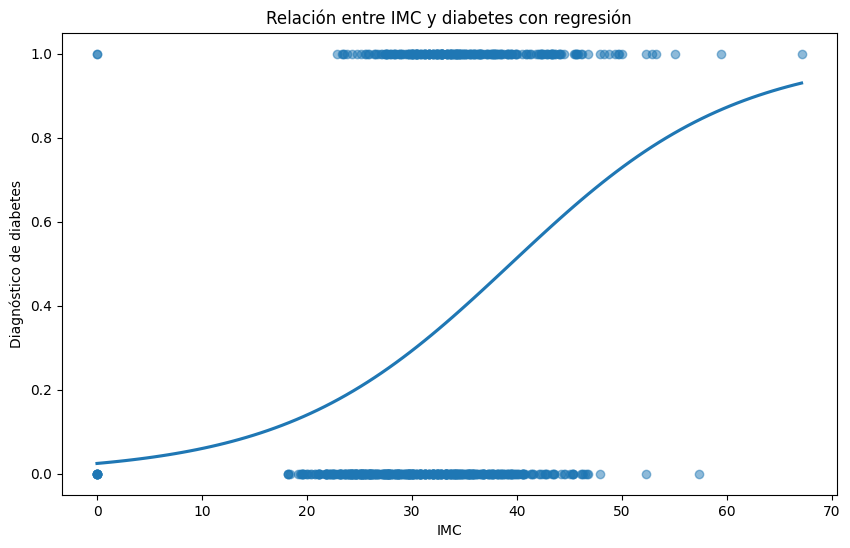

Precisión del modelo: 0.7662337662337663
Coeficientes de la regresión logística:
Intercepto: [-0.82437897]
Coeficientes: [[0.6547683  1.09673749]]
Matriz de confusión:
 [[84 15]
 [21 34]]


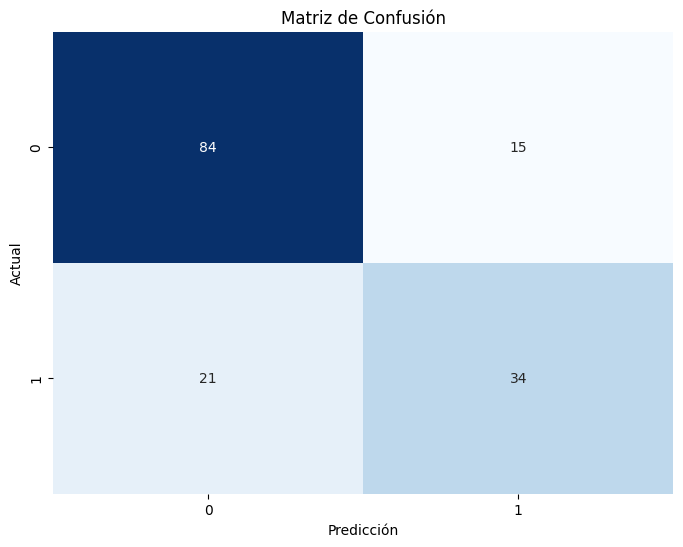

AUC-ROC: 0.8088154269972452


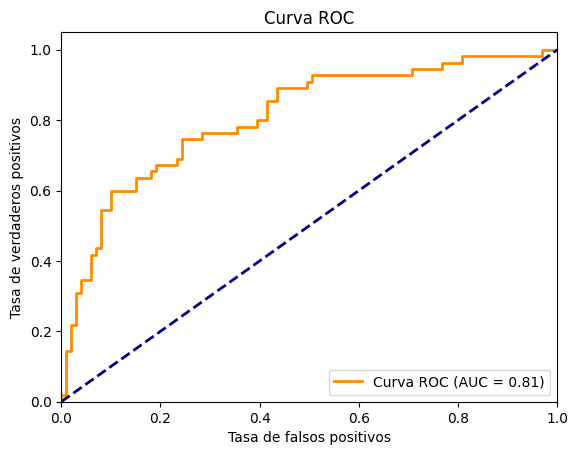

Puntajes de validación cruzada: [0.77272727 0.73376623 0.76623377 0.78431373 0.73856209]
Puntaje medio de validación cruzada: 0.7591206179441474
Modelo de Regresión:
Intercepto (beta_0): 25.402116839076637
Coeficiente de X (beta_1): 0.05451413904153221
Error cuadrático medio (MSE): 59.04509338515581


In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import networkx as nx
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

data = pd.read_csv("diabetes.csv")

# Correlaciones
correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlaciones')
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data['glucosa'], data['imc'], color='blue', alpha=0.5)
plt.title('Diagrama de Dispersión: Glucosa vs IMC')
plt.xlabel('Glucosa en la Sangre')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

# Relación entre glucosa y diabetes
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='glucosa', y='diabetes', logistic=True, ci=None, scatter_kws={'alpha':0.5})
plt.title('Relación entre glucosa y diabetes con regresión')
plt.xlabel('Nivel de glucosa')
plt.ylabel('Diagnóstico de diabetes')
plt.show()

# Relación entre IMC y diabetes
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='imc', y='diabetes', logistic=True, ci=None, scatter_kws={'alpha':0.5})
plt.title('Relación entre IMC y diabetes con regresión')
plt.xlabel('IMC')
plt.ylabel('Diagnóstico de diabetes')
plt.show()

# Variables independientes (X) y dependiente (y)
X = data[['imc', 'glucosa']]
y = data['diabetes']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)

# Coeficientes
print("Coeficientes de la regresión logística:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

# Matriz de confusión
cm = confusion_matrix(y_test, predicciones)
print("Matriz de confusión:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# ROC
y_prob = modelo.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc_roc)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
cv_scores = cross_val_score(modelo, X_scaled, y, cv=5, scoring='accuracy')
print("Puntajes de validación cruzada:", cv_scores)
print("Puntaje medio de validación cruzada:", cv_scores.mean())

# Prueba de Modelo
X = data['glucosa'].values.reshape(-1, 1)
Y = data['imc']
model = LinearRegression()
model.fit(X, Y)

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print("Modelo de Regresión:")
print("Intercepto (beta_0):", beta_0)
print("Coeficiente de X (beta_1):", beta_1)
Y_pred = model.predict(X)

# Error cuadrático medio
mse = mean_squared_error(Y, Y_pred)
print("Error cuadrático medio (MSE):", mse)

Morse

In [ ]:
def find_critical_points(X, Y):
    critical_points = []
    for x, y in zip(X, Y):
        if np.sum(X + Y > x + y) > 1:
            critical_points.append((x, y))
    return np.array(critical_points)

X = data['glucosa'].values
Y = data['imc'].values
critical_points = find_critical_points(X, Y)

G = nx.DiGraph()
for point in critical_points:
    G.add_node(tuple(point), pos=point)
for i, p1 in enumerate(critical_points):
    for j, p2 in enumerate(critical_points):
        if i != j:
            direction = p2 - p1
            if np.dot(direction, np.array([1, 1])) > 0:
                G.add_edge(tuple(p1), tuple(p2))

plt.figure(figsize=(8, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Grafico de Morse')
plt.xlabel('Glucosa en la Sangre')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [ ]:
plt.hist(data['glucosa'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.title('Distribución de Glucosa')
plt.show()
plt.hist(data['imc'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.title('Distribución de IMC')
plt.show()

In [ ]:
df_grouped = data.groupby('glucosa')['imc'].sum()
df_grouped.plot(kind='bar', color='green')
plt.xlabel('Glucosa')
plt.ylabel('IMC')
plt.title('Glocosa por IMC')
plt.show()

In [ ]:
plt.boxplot(data['glucosa'])
plt.ylabel('Glucosa')
plt.title('Distribución de Glucosa')
plt.show()
plt.boxplot(data['imc'])
plt.ylabel('IMC')
plt.title('Distribución de Glucosa')
plt.show()

In [ ]:
import seaborn as sns
sns.regplot(x='glucosa', y='imc', data=data, scatter_kws={'alpha':0.5})
plt.xlabel('Glucosa')
plt.ylabel('IMC')
plt.title('Gráfico Dispersión con Línea de Tendencia')
plt.grid(True)
plt.show()
correlacion = data['glucosa'].corr(data['imc'])
print("Coeficiente de correlación:", correlacion)

### **REEB** y Construccion de ecuaciones

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('diabetes.csv')
# Dividir variables independientes (X) y dependiente (y)
X = df[['imc', 'glucosa']]
y = df['diabetes']
# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
# Predecir el conjunto de prueba
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)
print("Coeficientes de la regresión logística:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Precisión del modelo: 0.7662337662337663
Coeficientes de la regresión logística:
Intercepto: [-7.7309131]
Coeficientes: [[0.08423473 0.03480462]]


In [ ]:
X = df[['edad', 'glucosa']]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)
print("Coeficientes de la regresión logística:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Precisión del modelo: 0.7597402597402597
Coeficientes de la regresión logística:
Intercepto: [-6.07246897]
Coeficientes: [[0.03460804 0.0342938 ]]


In [ ]:
X = df[['imc', 'edad']]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)
print("Coeficientes de la regresión logística:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Precisión del modelo: 0.6428571428571429
Coeficientes de la regresión logística:
Intercepto: [-6.18399382]
Coeficientes: [[0.10873714 0.05845342]]


La ecuación del modelo es una regresión logística y se puede expresar de la siguiente manera:

Donde:
-	P(y=1∣X) es la probabilidad que la variable dependiente Y sea igual a 1 dadas las variables independientes X.
-	B0 es el intercepto del modelo.
-	B1 y B2 son los coeficientes asociados a las variables independientes "imc" y "glucosa" respectivamente.
Para las 2 ecuaciones faltantes, se debe solo sustituir las variables de estudio, a continuación, se muestran los coeficientes para las ecuaciones:

Ecuación  	Precisión  	B0  	B1  	B2

1	  76.6%	  -7.731	  0.0842	  0.0348

2	  76.0%  	-6.072	  0.0346	  0.0343

3	  64.3%  	-6.184  	0.1087	  0.0585



In [ ]:
# Nuevos datos de glucosa e IMC
nueva_glucosa = float(input("Introduce el nivel de glucosa: "))
nuevo_imc = float(input("Introduce el IMC: "))
# Predicción
prediccion = modelo.predict([[nuevo_imc, nueva_glucosa]])
if prediccion[0] == 1:
    print("El modelo predice que la probabilidad que la persona tenga diabetes es positiva.")
else:
    print("El modelo predice que la probabilidad que la persona tenga  diabetes es baja.")

Introduce el nivel de glucosa: 60
Introduce el IMC: 19
El modelo predice que la probabilidad que la persona tenga  diabetes es baja.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


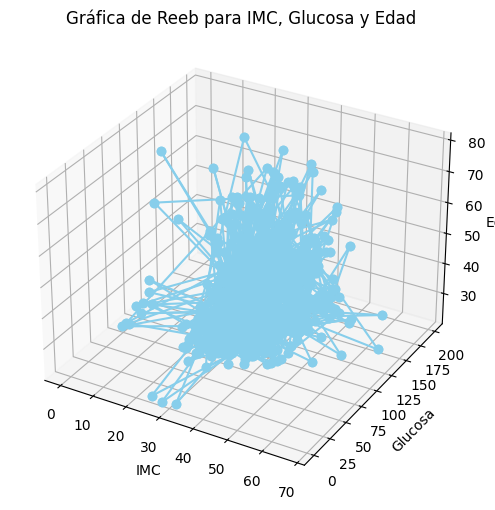

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Gráfica de Reeb
def build_reeb_graph_3d(x, y, z):
    G = nx.Graph()
    for i in range(len(x)-1):
        if y[i] != y[i+1] or z[i] != z[i+1]:
            G.add_edge((x[i], y[i], z[i]), (x[i+1], y[i+1], z[i+1]))
    return G
def plot_reeb_graph_3d(G, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for edge in G.edges():
        x_values = [edge[0][0], edge[1][0]]
        y_values = [edge[0][1], edge[1][1]]
        z_values = [edge[0][2], edge[1][2]]
        ax.plot(x_values, y_values, z_values, marker='o', color='skyblue')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title('Gráfica de Reeb para {}, {} y {}'.format(xlabel, ylabel, zlabel))
    plt.show()
# Gráfica para 'imc', 'glucosa' y 'edad'
G_3d = build_reeb_graph_3d(df['imc'], df['glucosa'], df['edad'])
plot_reeb_graph_3d(G_3d, 'IMC', 'Glucosa', 'Edad')


Ejes:

El eje X representa el índice de masa corporal (IMC).
El eje Y representa la glucosa en sangre.
El eje Z representa la edad.
Forma del gráfico:

El gráfico tiene una forma irregular, con una serie de picos y valles. Esto sugiere que no hay una relación lineal simple entre las tres variables.

Interpretación:

En general, parece que hay una tendencia positiva entre el IMC y la glucosa. Esto significa que a medida que el IMC aumenta, la glucosa en sangre también tiende a aumentar.
La edad parece tener una relación más compleja con la glucosa. En algunos casos, la glucosa parece aumentar con la edad, mientras que en otros casos parece disminuir.